In [1]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
images_folder = Path("exp/mnist-tddpmm-t4-quad-256-vgg-nocal/images")
images = []
for image_path in images_folder.iterdir():
    image = Image.open(image_path)
    images.append(np.array(image))

In [3]:
images = np.array(images)

In [4]:
now_reshaped = images.reshape(5, 5, 28, 28)

# 接下来进行水平拼接，每一行拼接5张图片
horizontal_concat = np.concatenate(now_reshaped, axis=2)

# 最后进行垂直拼接，将5行拼接起来
combined_image = np.concatenate(horizontal_concat, axis=0)

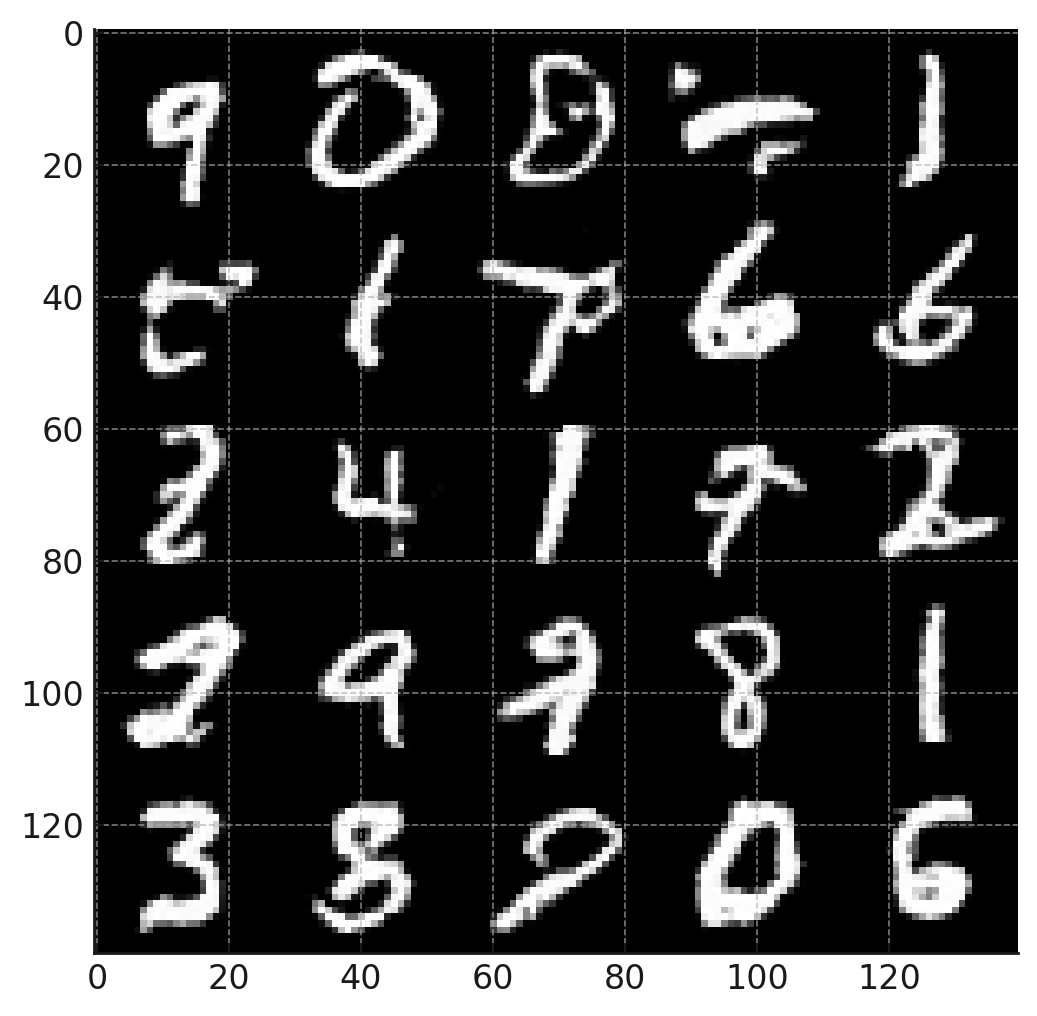

In [5]:
plt.imshow(combined_image, cmap='gray')
plt.show()

In [17]:
from utils.dataset import LMDBData, MNISTData   
db_path = "../new_diffusion_distillation/data/mnist_origin_debug/uniform/lmdb"
trainset = MNISTData(db_path, 
                        data_shape=[1, 17, 28, 28],
                        dims=[1, 0, 2, 3],  
                        t_idx=None, 
                        num_data=None)

100%|██████████| 10240/10240 [00:01<00:00, 9033.04it/s]


In [18]:
raw = trainset[:25]

In [19]:
raw.squeeze().shape

torch.Size([25, 17, 28, 28])

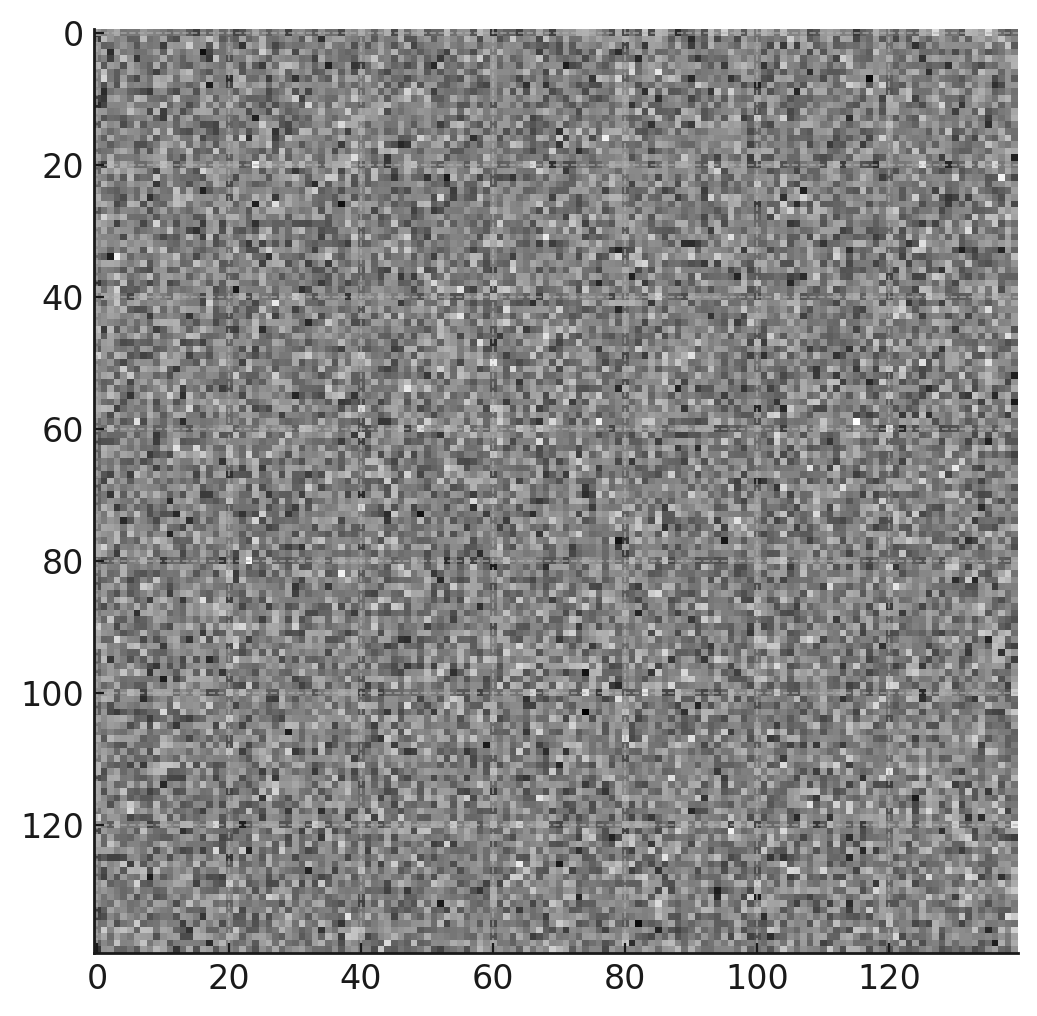

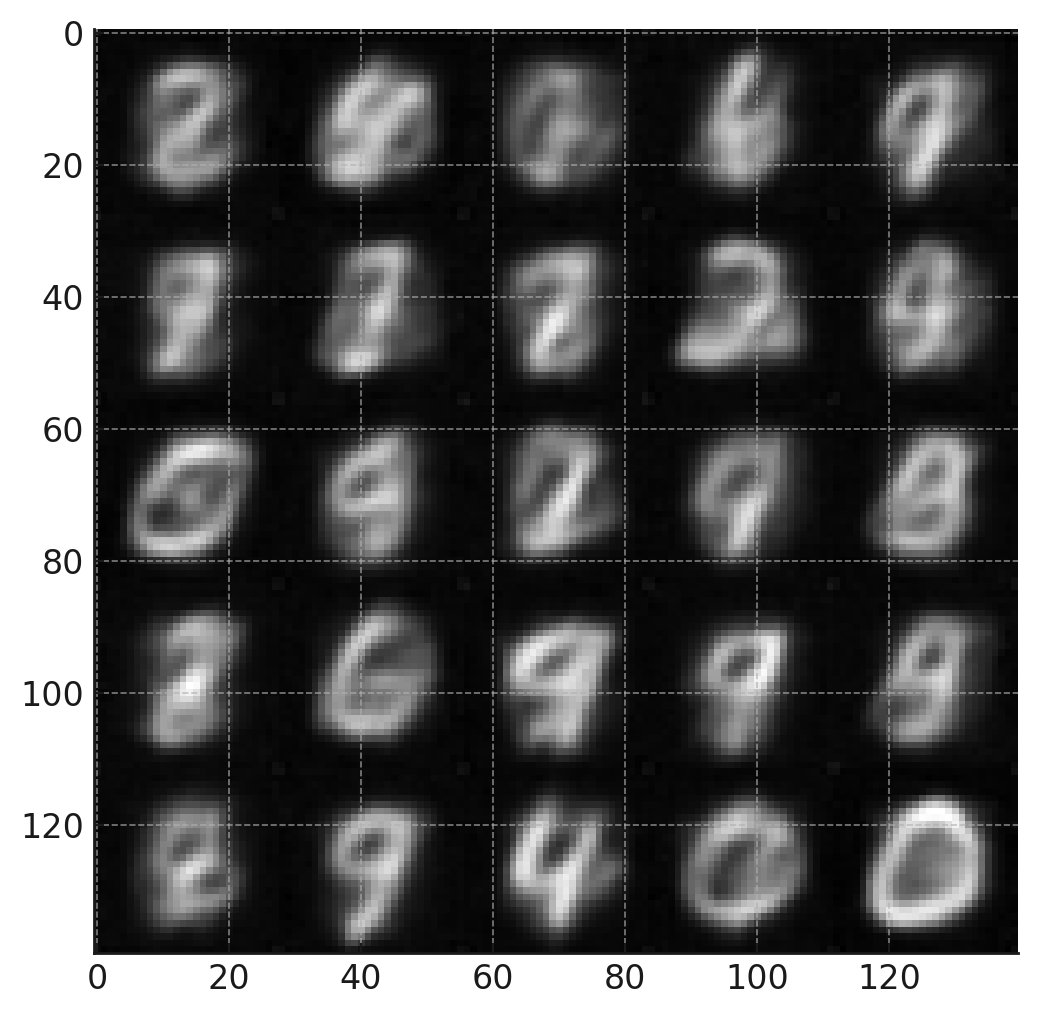

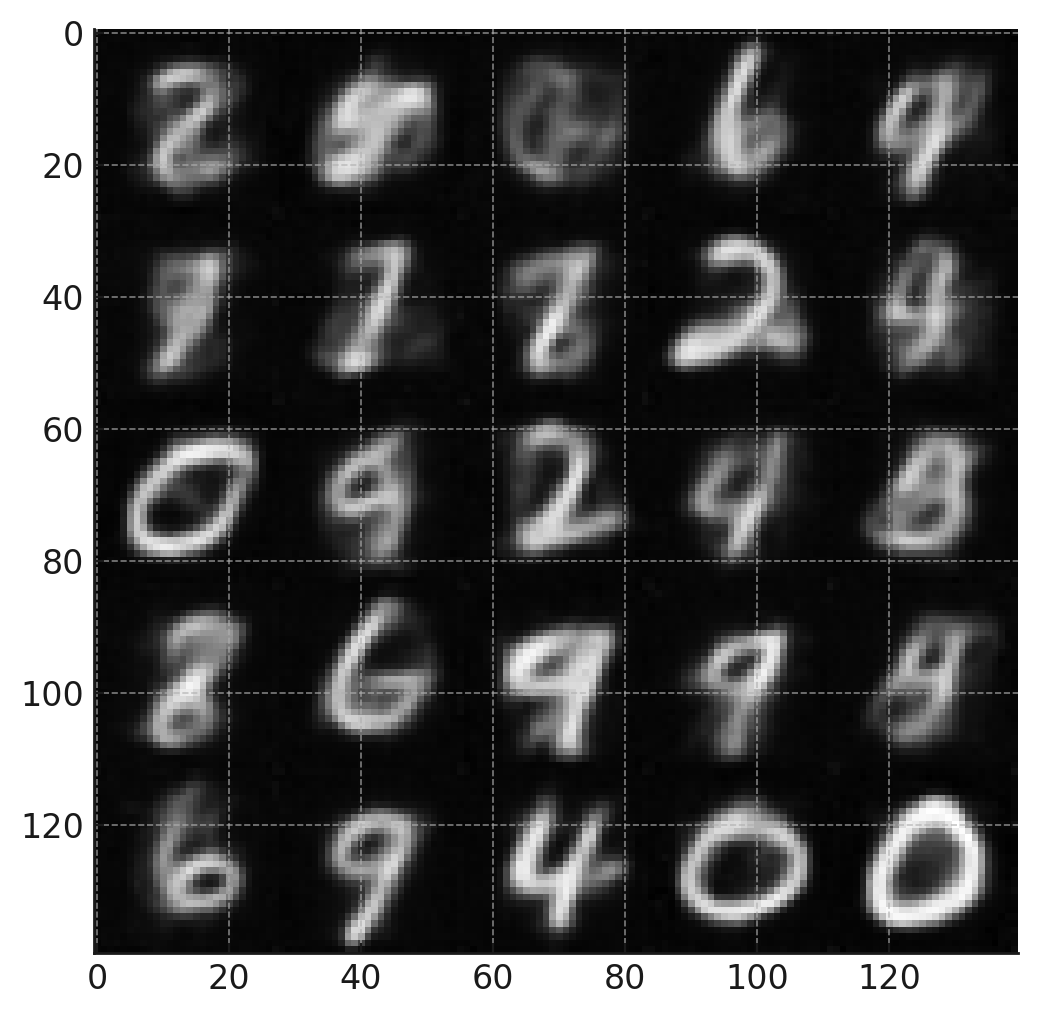

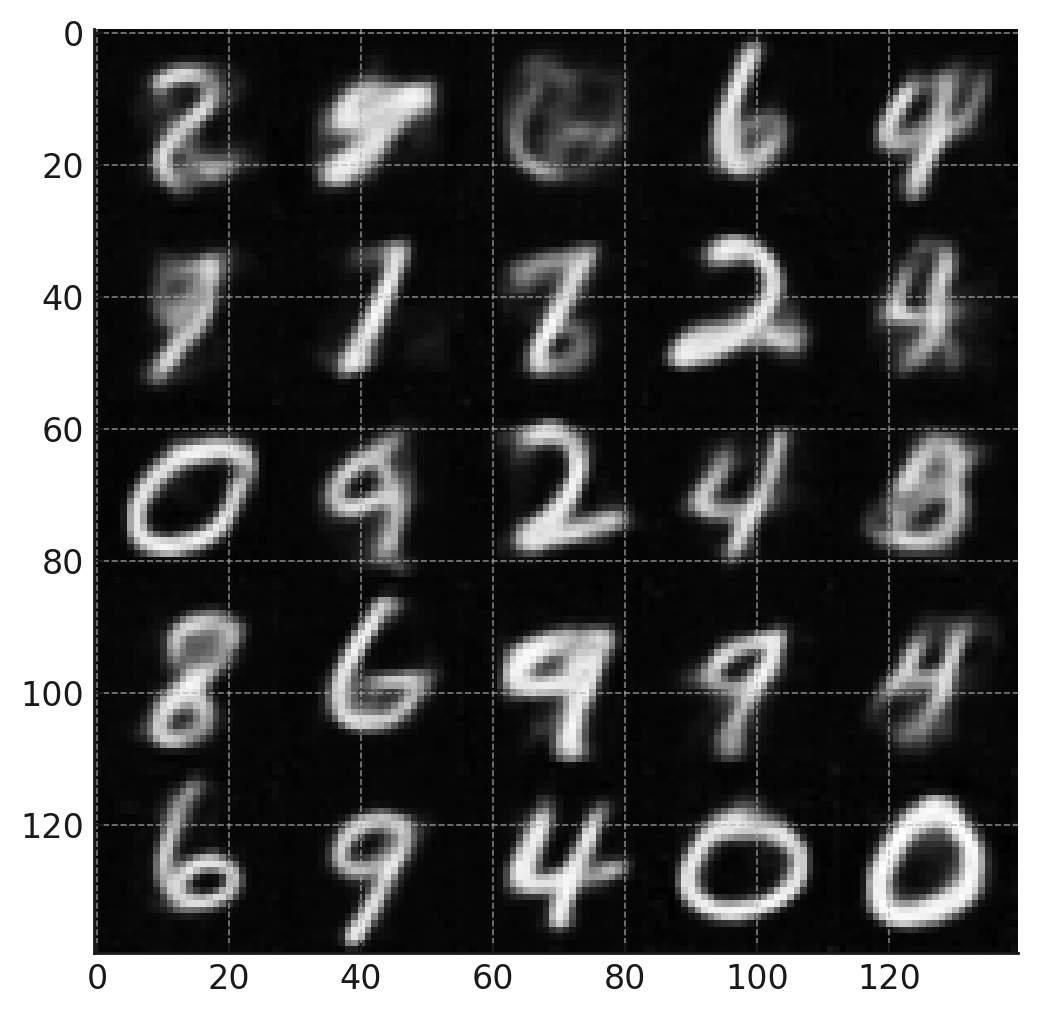

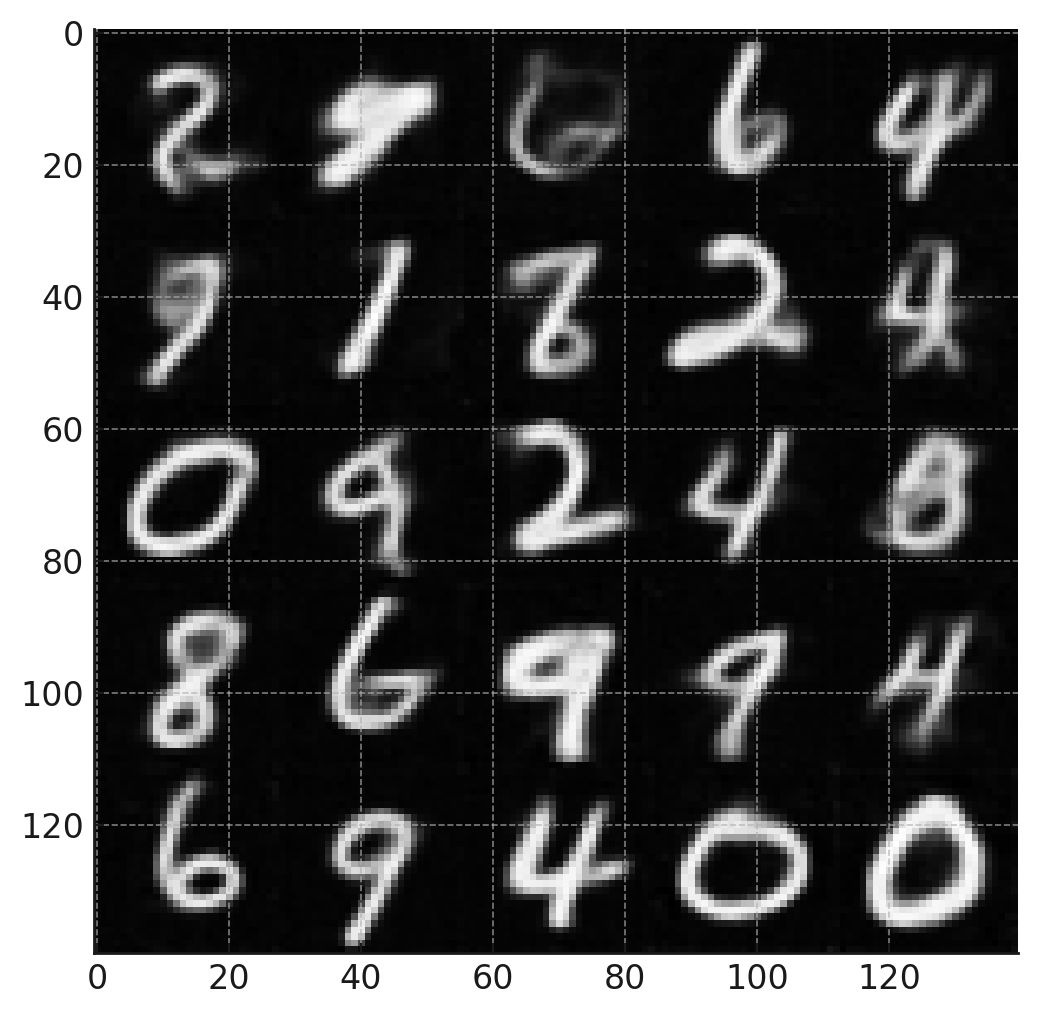

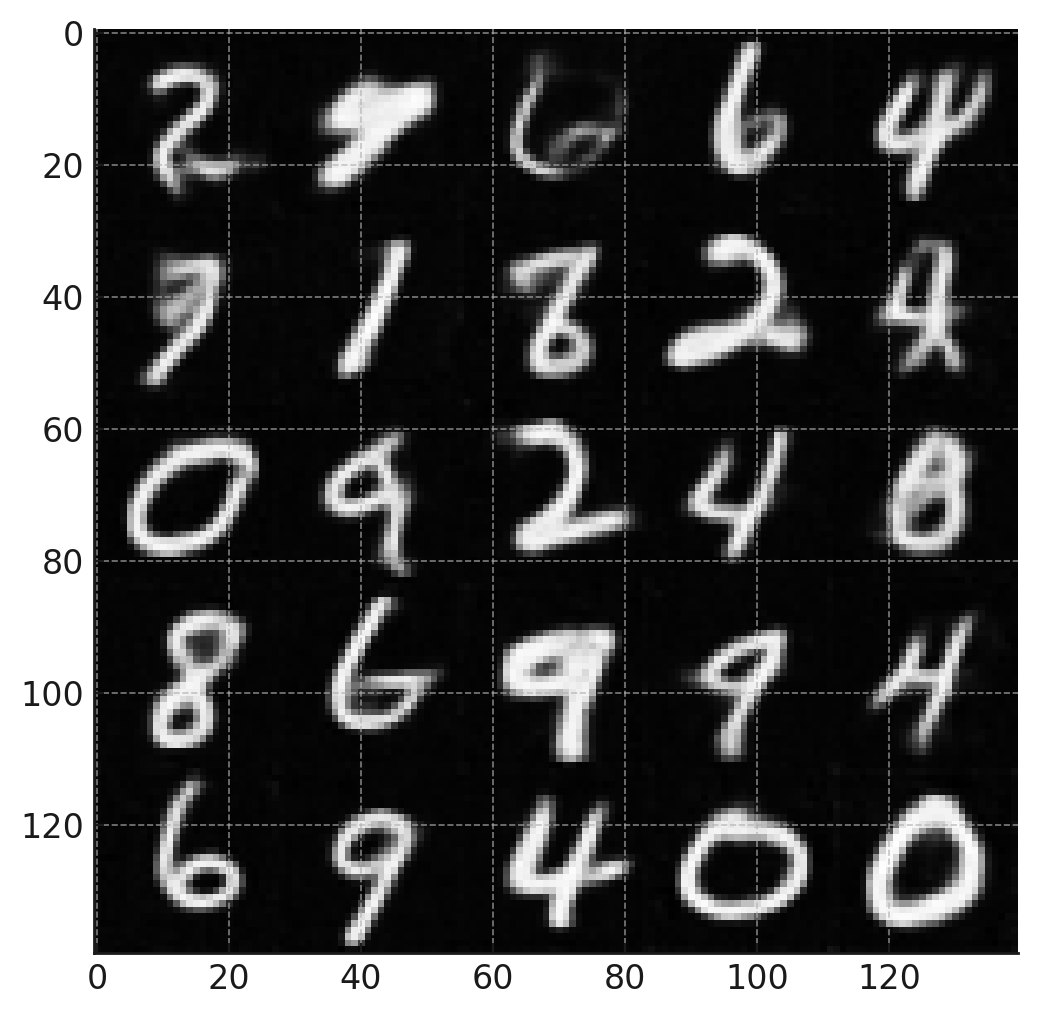

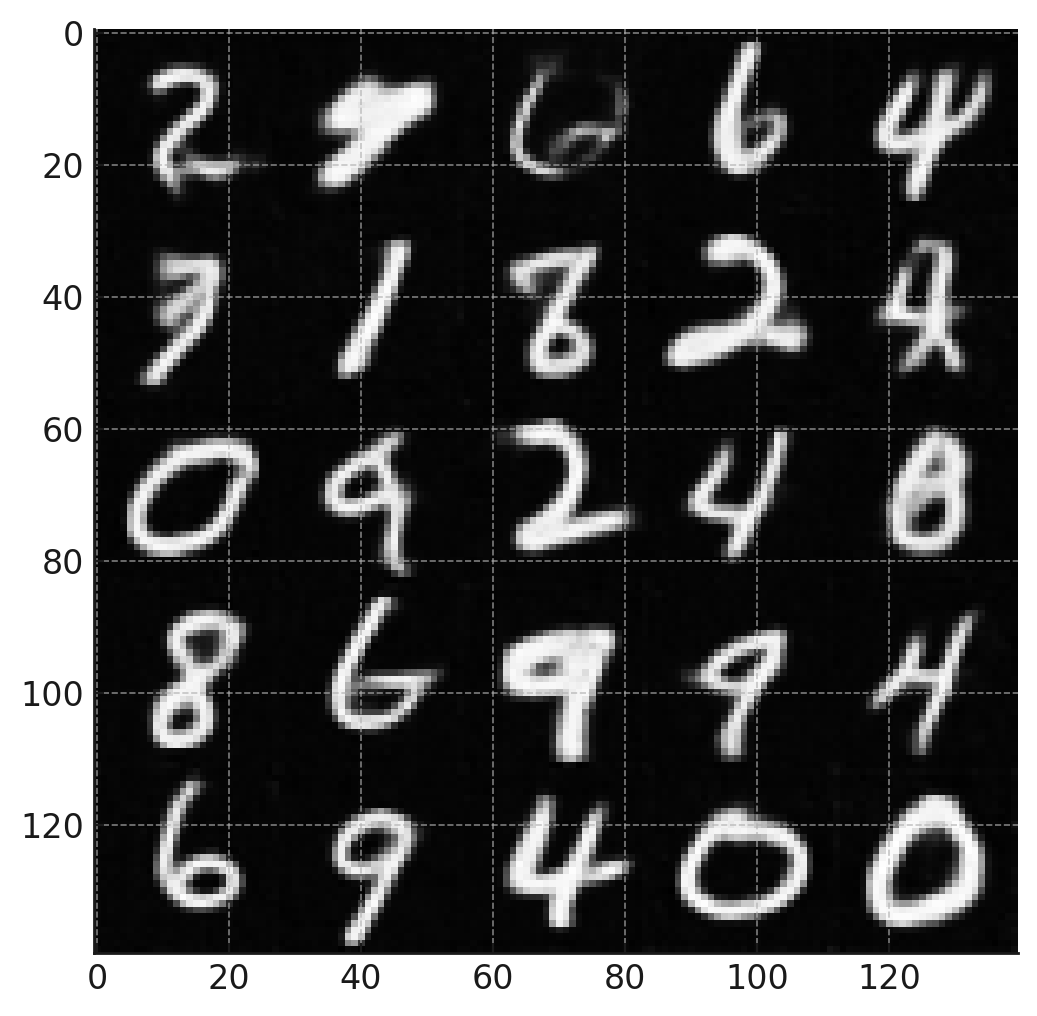

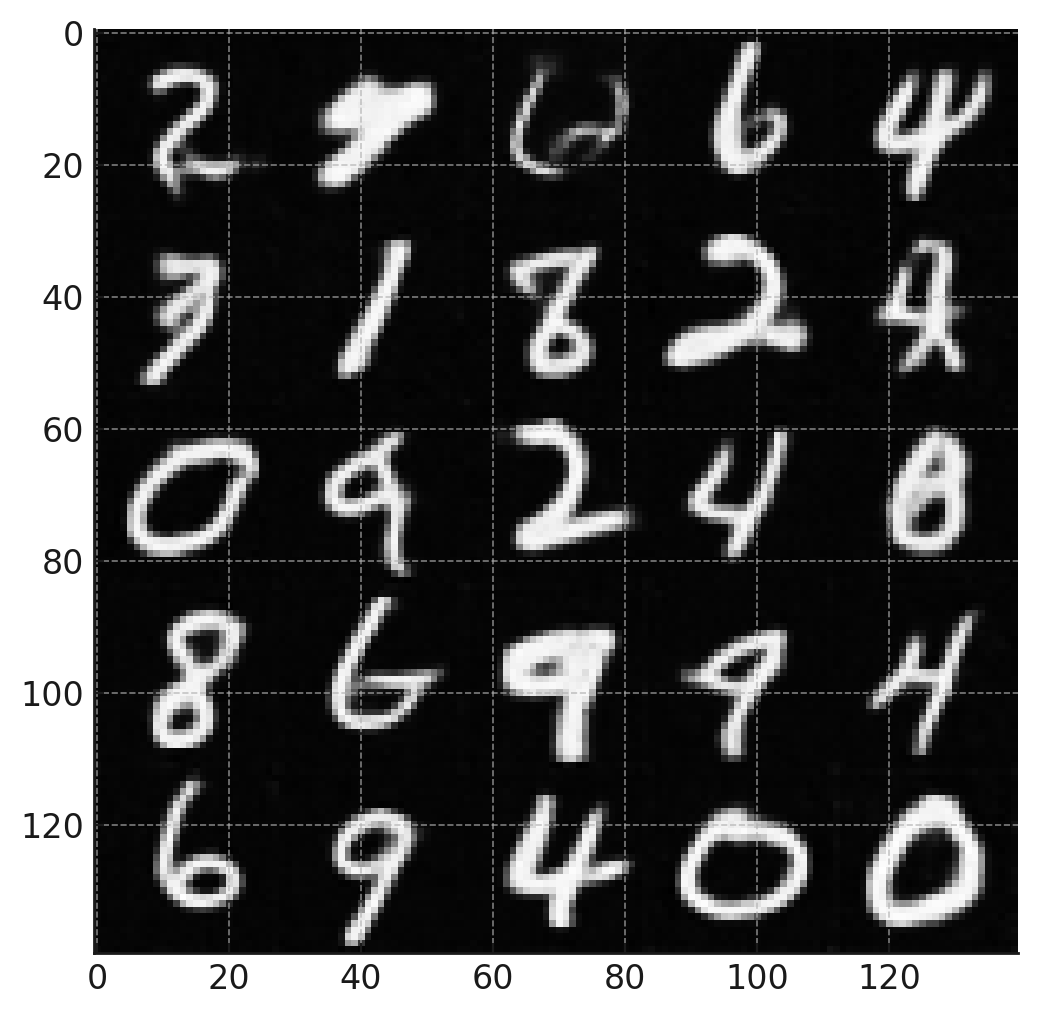

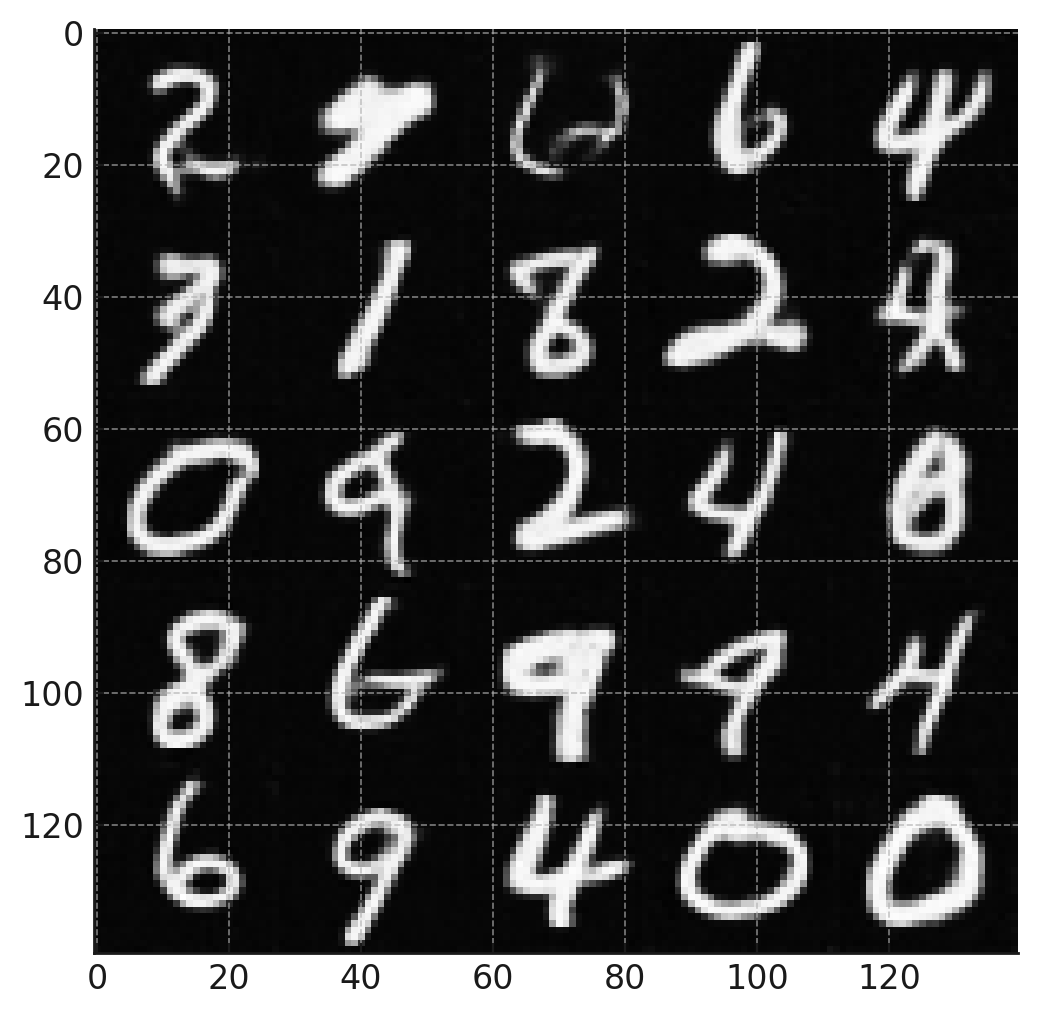

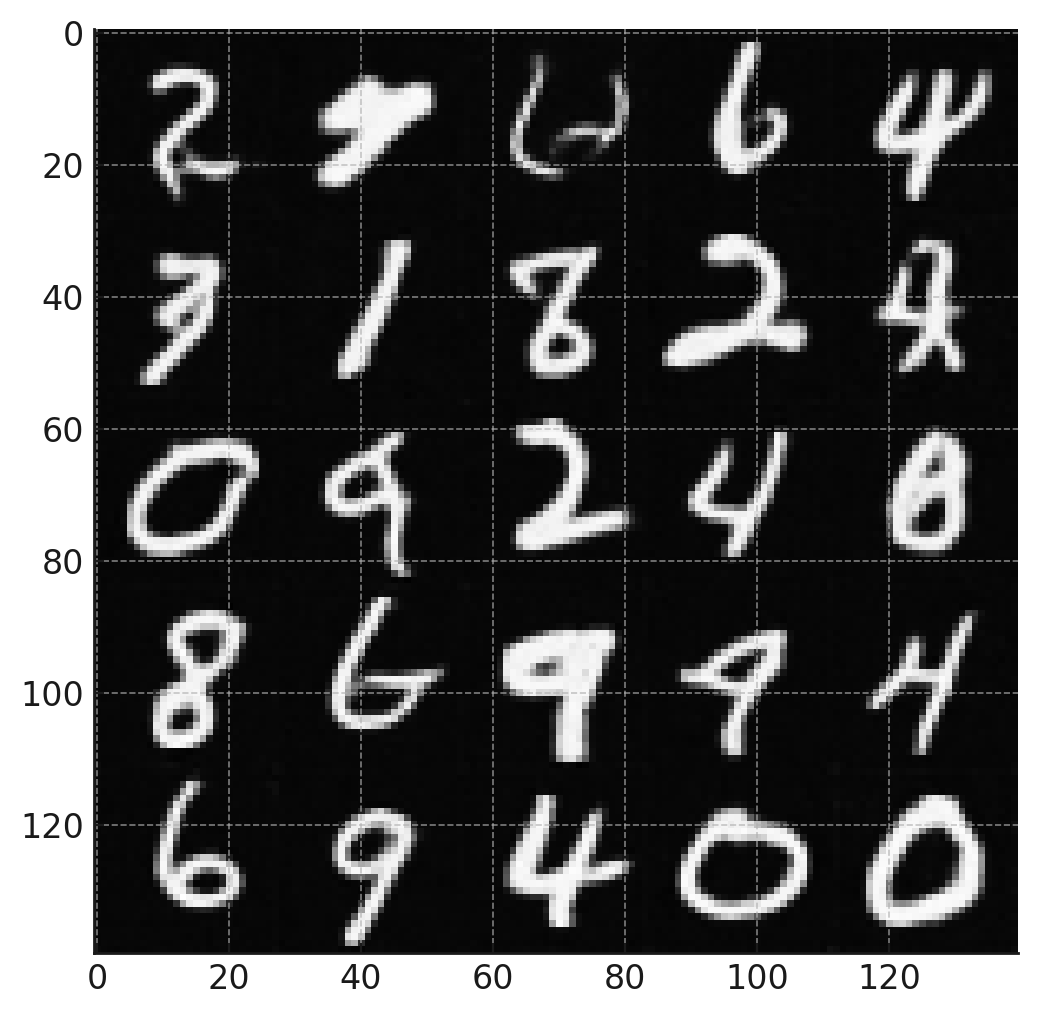

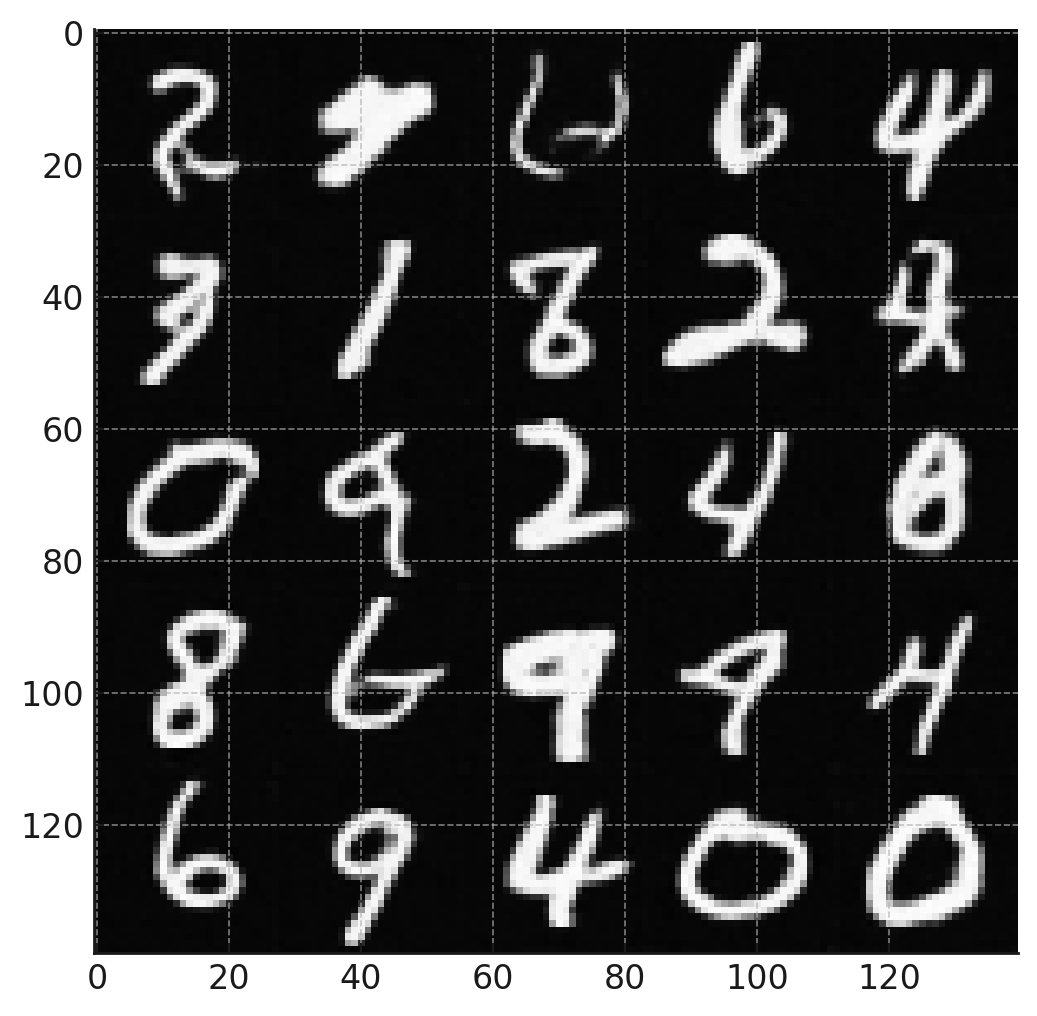

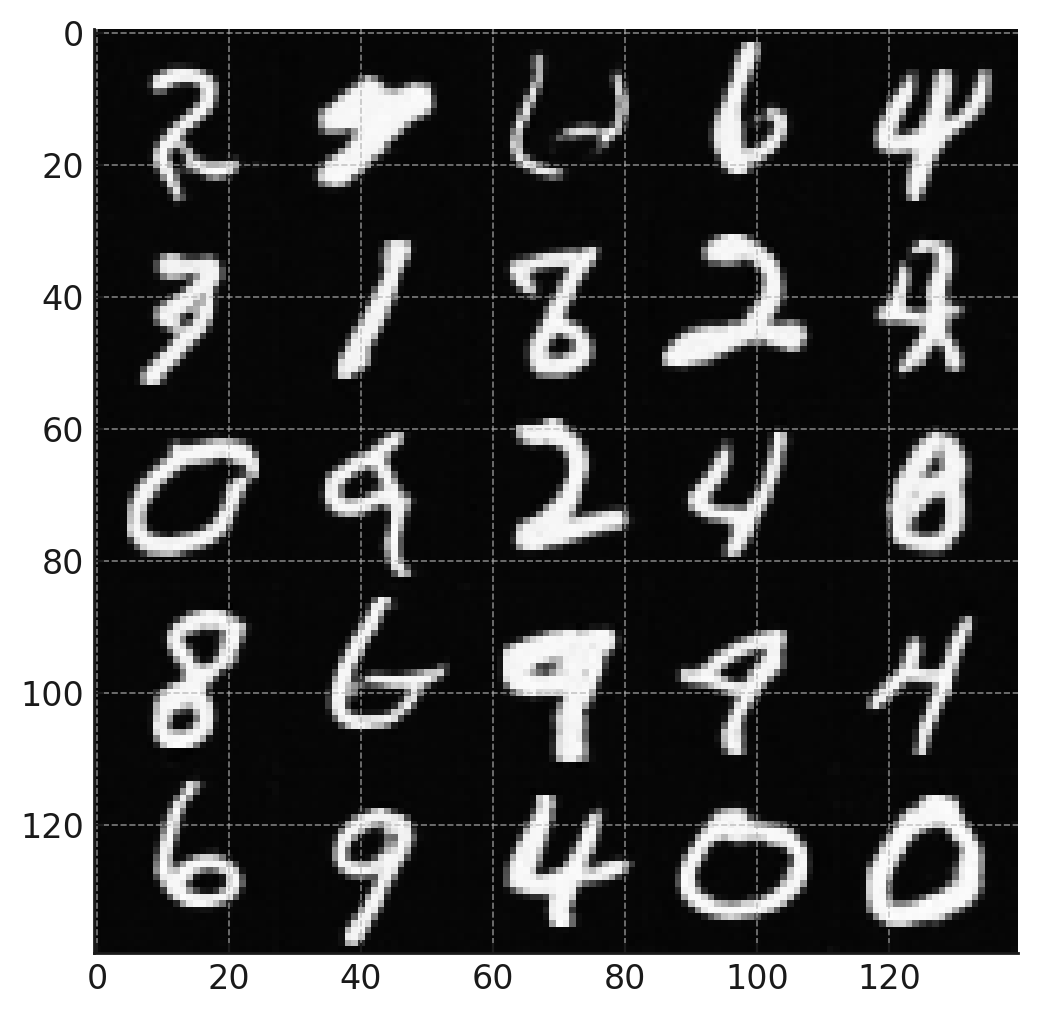

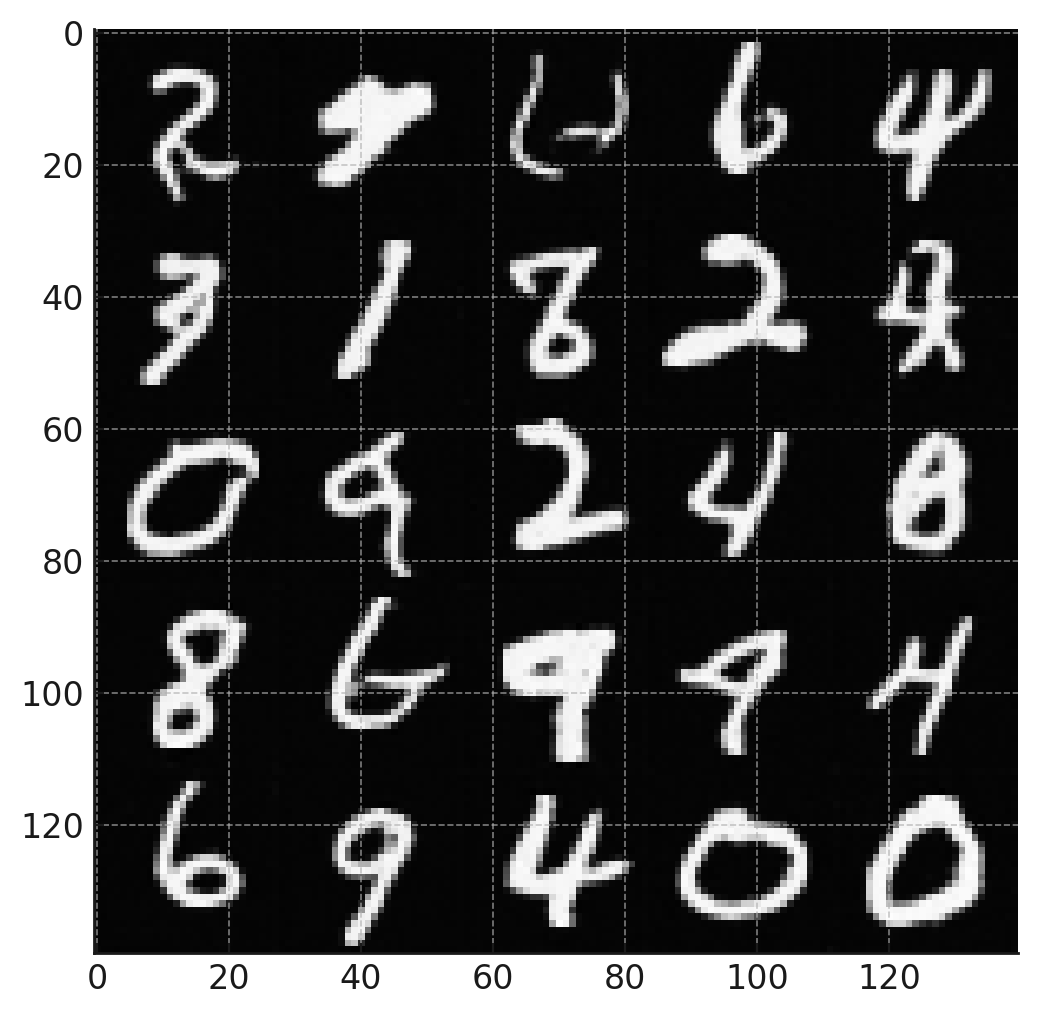

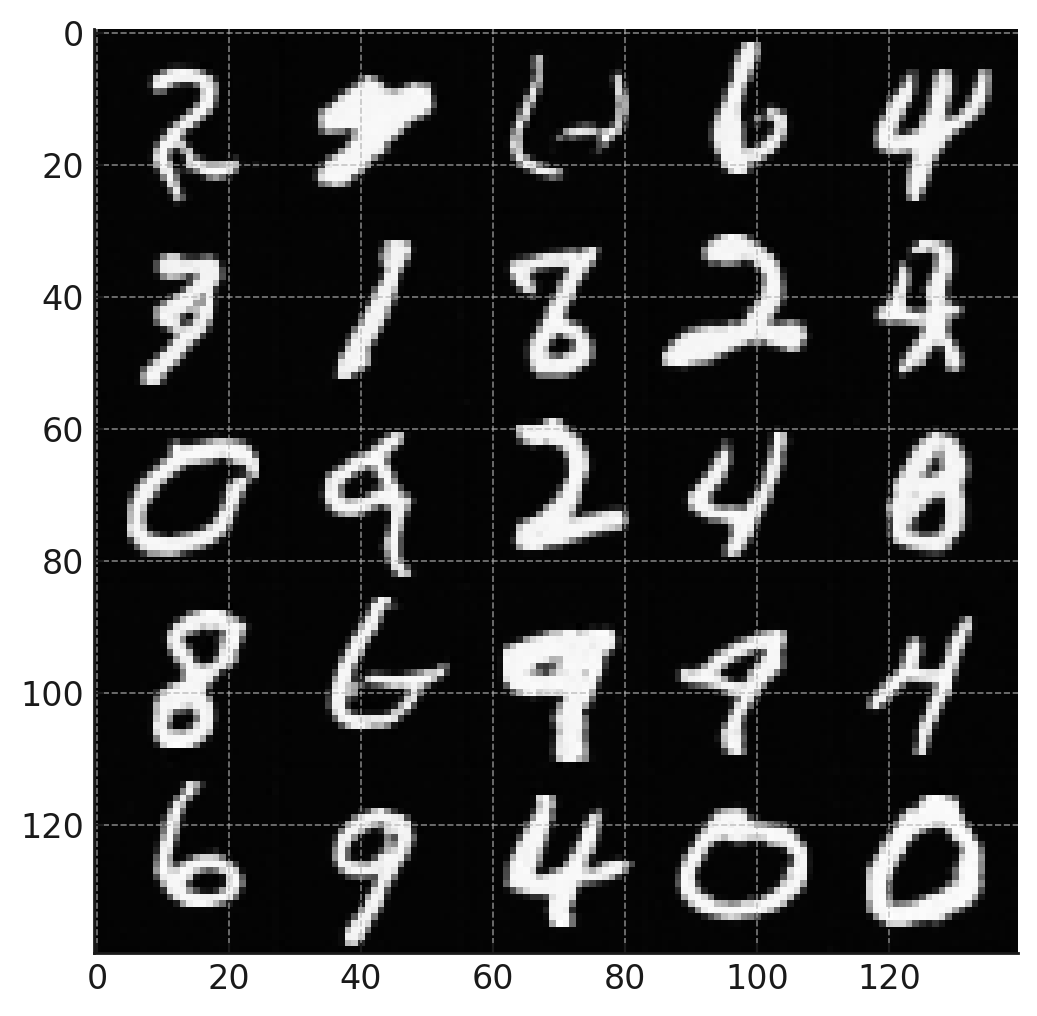

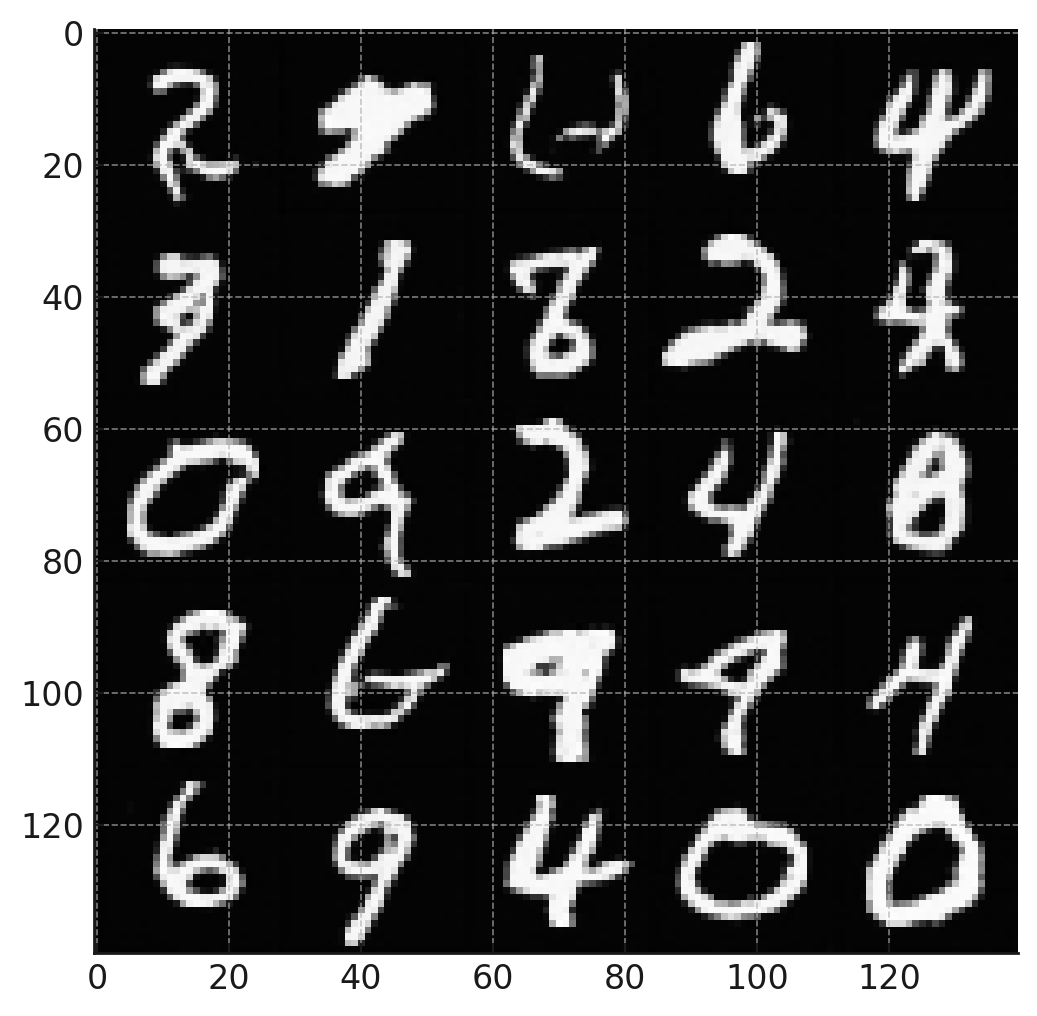

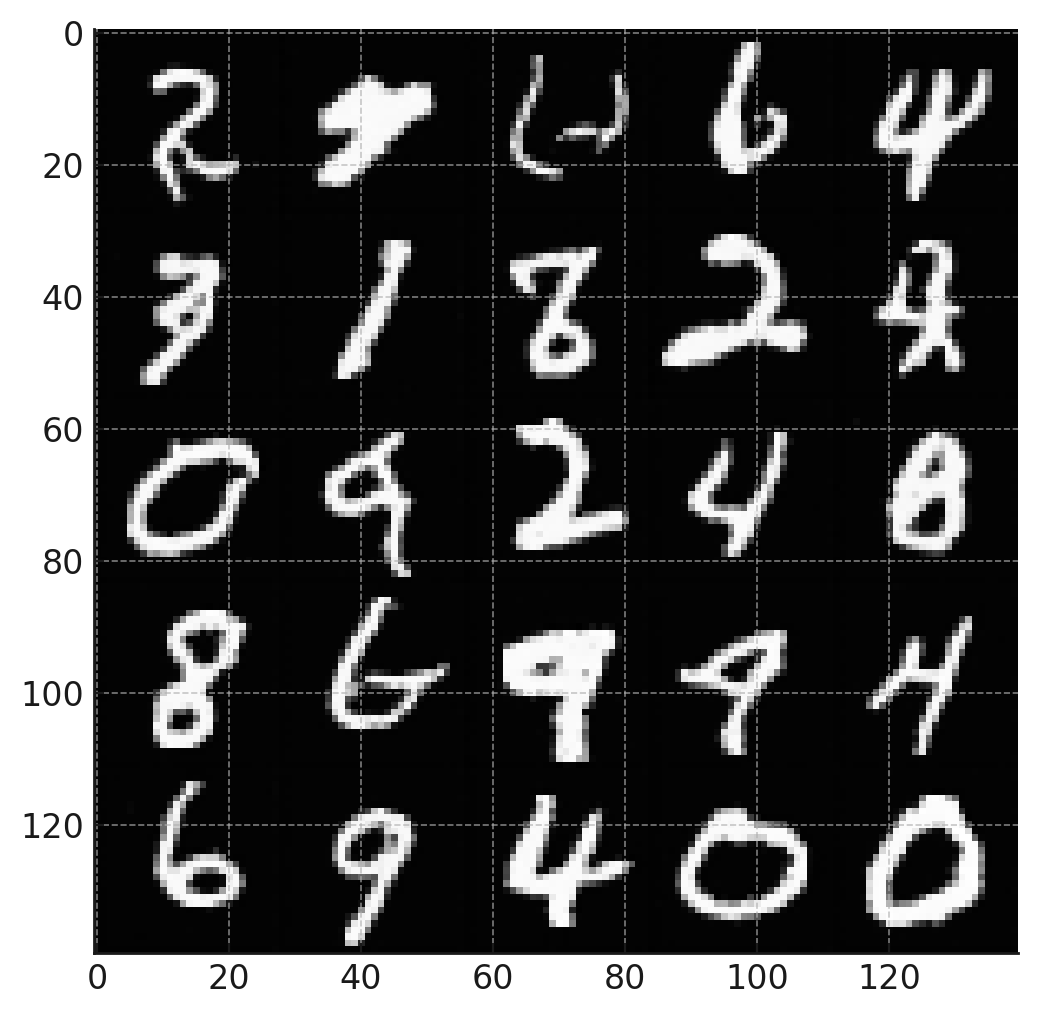

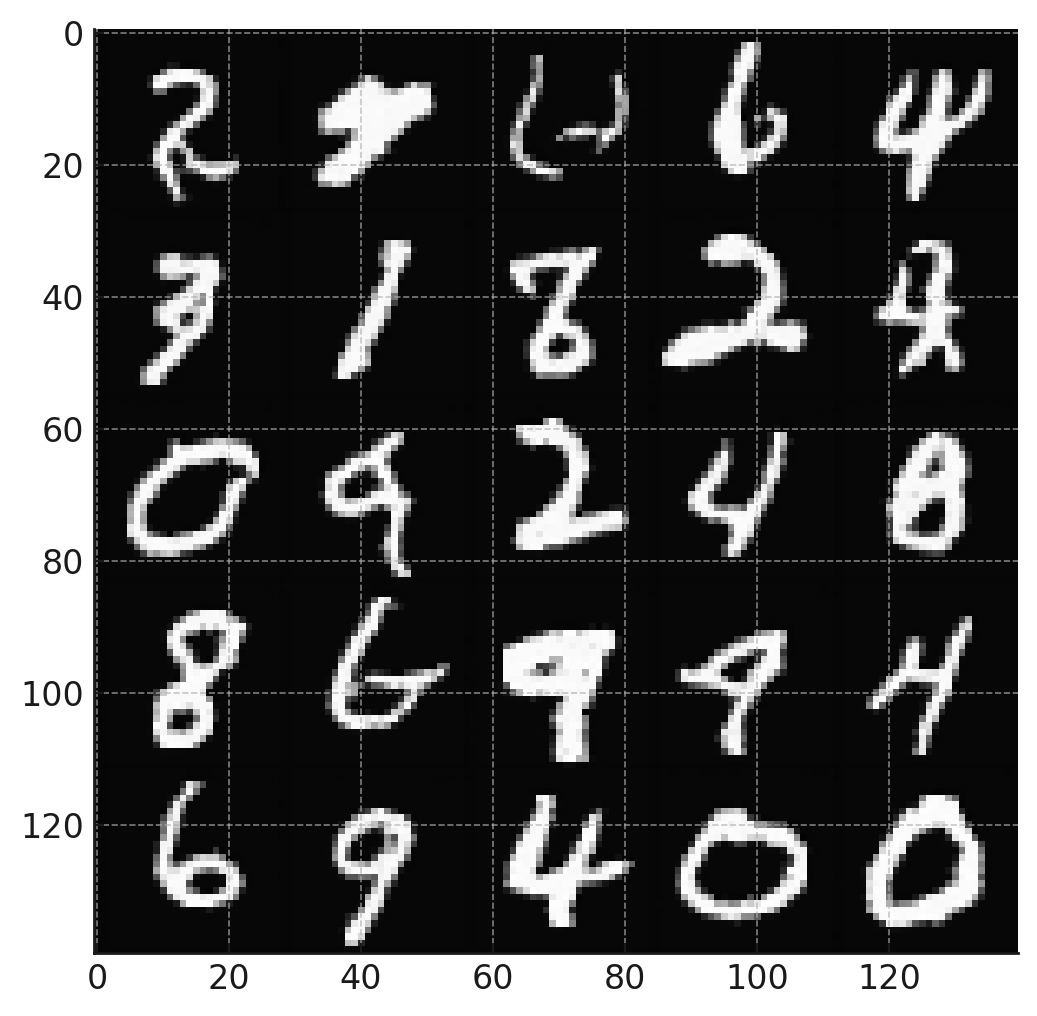

In [20]:
for i in range(17):
    now = raw[:, i]
    now_np = now.numpy()
    now_reshaped = now_np.reshape(5, 5, 28, 28)

    # 接下来进行水平拼接，每一行拼接5张图片
    horizontal_concat = np.concatenate(now_reshaped, axis=2)

    # 最后进行垂直拼接，将5行拼接起来
    combined_image = np.concatenate(horizontal_concat, axis=0)
    plt.imshow(combined_image, cmap='gray')
    plt.show()